In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ruta_archivo = "/content/activity_1_ml(2).csv"

In [ ]:
data = pd.read_csv(ruta_archivo)

In [ ]:
print(data)

      WAGE  EDUC  EXPER  GENDER FAM_STATUS  TENURE
0    10.00     0      3    male    MARRIED       2
1     3.50     0      2  female      alone       0
2     3.30     0      5  female     single       0
3     5.00     0     15    male    married       5
4    11.25     0     28    male    married      25
..     ...   ...    ...     ...        ...     ...
547   3.00     0      9    male        NaN       0
548   7.63     0      8  female     single       4
549   4.50     0     36  female    married       6
550    NaN     0     28    male    married       3
551   6.36     0      8    male    married       1

[552 rows x 6 columns]


In [ ]:
wage = data[['WAGE', 'EDUC', 'EXPER', 'GENDER', 'FAM_STATUS', 'TENURE']]

In [ ]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WAGE        490 non-null    float64
 1   EDUC        552 non-null    int64  
 2   EXPER       552 non-null    int64  
 3   GENDER      549 non-null    object 
 4   FAM_STATUS  469 non-null    object 
 5   TENURE      552 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 26.0+ KB


In [ ]:
wage = data.drop('EDUC', axis=1)

In [ ]:
wage

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,MARRIED,2
1,3.50,2,female,alone,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
547,3.00,9,male,NaN,0
548,7.63,8,female,single,4
549,4.50,36,female,married,6
550,NaN,28,male,married,3


In [ ]:
wage.duplicated().sum()

17

In [ ]:
wage.drop_duplicates(inplace=True)
wage.reset_index(drop=True, inplace=True)

In [ ]:
wage.duplicated().sum()

0

In [ ]:
wage

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,MARRIED,2
1,3.50,2,female,alone,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
530,2.90,1,male,single,2
531,3.25,14,female,married,2
532,7.63,8,female,single,4
533,NaN,28,male,married,3


In [ ]:
wage['GENDER'].unique()

array(['male', 'female', 'MALE', 'FEMALE', 'man', 'woman', nan],
      dtype=object)

In [ ]:
dictio_correct = {'woman':'female',
                  'fem':'female',
                  'man':'male',
                  'female':'female',
                  'male':'male',
                  'FEMALE':'female',
                  'MALE':'male'}

In [ ]:
wage['GENDER'] = wage['GENDER'].map(dictio_correct)

In [ ]:
wage['GENDER'].unique()

array(['male', 'female', nan], dtype=object)

In [ ]:
wage = wage.dropna(subset=['GENDER'])

In [ ]:
wage['GENDER'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
wage

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,MARRIED,2
1,3.50,2,female,alone,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
547,3.00,9,male,NaN,0
548,7.63,8,female,single,4
549,4.50,36,female,married,6
550,NaN,28,male,married,3


In [ ]:
wage['FAM_STATUS'].unique()

array(['MARRIED', 'alone', 'single', 'married', nan, 'SINGLE'],
      dtype=object)

In [ ]:
dictio_correct = {'MARRIED':'married',
                  'alone':'single',
                  'SINGLE':'single',
                  'single':'single',
                  'married':'married'}

In [ ]:
wage['FAM_STATUS'] = wage['FAM_STATUS'].map(dictio_correct)

<ipython-input-117-08c9c447c97d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage['FAM_STATUS'] = wage['FAM_STATUS'].map(dictio_correct)


In [ ]:
wage = wage.dropna(subset=['FAM_STATUS'])

In [ ]:
wage

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,married,2
1,3.50,2,female,single,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
546,3.25,14,female,married,2
548,7.63,8,female,single,4
549,4.50,36,female,married,6
550,NaN,28,male,married,3


In [ ]:
wage['EXPER'].unique()

array([ 3,  2,  5, 15, 28, 47,  1, 38, 27, 18,  6, 17, 14, 22, 31,  7, 30,
       19, 39, 43, 48, 10, 11, 24, 35,  9, 25, 42, 41, 26, 29,  8,  4, 37,
       34, 23, 44, 33, 13, 16, 21, 32, 36, 51, 45, 20, 49, 40, 12])

In [ ]:
wage['WAGE'].unique()

array([10.        ,  3.5       ,  3.29999995,  5.        , 11.25      ,
        4.28999996,  5.57999992,  3.        ,  4.6500001 ,         nan,
        7.5       ,  3.3499999 ,  7.        ,  3.27999997,  3.25      ,
       12.5       ,  3.4000001 ,  4.38000011,  3.28999996, 11.56000042,
        8.44999981,  3.20000005,  4.80999994,  3.0999999 ,  2.9000001 ,
        4.        ,  4.75      , 17.70999908,  4.5       ,  5.11000013,
        7.25      ,  6.        ,  3.05999994,  6.17999983,  6.07999992,
        2.95000005, 22.20000076,  3.6400001 , 11.97999954, 13.07999992,
        1.96000004,  3.82999992,  5.5999999 ,  8.75      ,  4.57000017,
        4.90999985, 13.32999992,  8.47999954,  8.43000031, 11.81999969,
        9.09000015, 10.94999981,  5.25      ,  3.75      , 15.38000011,
        3.25999999,  6.76000023,  8.52999973,  3.50999999,  3.45000005,
       10.38000011,  2.70000005, 19.97999954, 12.39000034,  5.05000019,
        5.69999981,  4.11000013,  7.5999999 ,  7.78000021,  6.25

In [ ]:
wage = wage.dropna(subset=['WAGE'])

In [ ]:
wage['WAGE'].unique()

array([10.        ,  3.5       ,  3.29999995,  5.        , 11.25      ,
        4.28999996,  5.57999992,  3.        ,  4.6500001 ,  7.5       ,
        3.3499999 ,  7.        ,  3.27999997,  3.25      , 12.5       ,
        3.4000001 ,  4.38000011,  3.28999996, 11.56000042,  8.44999981,
        3.20000005,  4.80999994,  3.0999999 ,  2.9000001 ,  4.        ,
        4.75      , 17.70999908,  4.5       ,  5.11000013,  7.25      ,
        6.        ,  3.05999994,  6.17999983,  6.07999992,  2.95000005,
       22.20000076,  3.6400001 , 11.97999954, 13.07999992,  1.96000004,
        3.82999992,  5.5999999 ,  8.75      ,  4.57000017,  4.90999985,
       13.32999992,  8.47999954,  8.43000031, 11.81999969,  9.09000015,
       10.94999981,  5.25      ,  3.75      , 15.38000011,  3.25999999,
        6.76000023,  8.52999973,  3.50999999,  3.45000005, 10.38000011,
        2.70000005, 19.97999954, 12.39000034,  5.05000019,  5.69999981,
        4.11000013,  7.5999999 ,  7.78000021,  6.25      ,  4.09

In [ ]:
wage

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,married,2
1,3.50,2,female,single,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
545,2.90,1,male,single,2
546,3.25,14,female,married,2
548,7.63,8,female,single,4
549,4.50,36,female,married,6


In [ ]:
wage['TENURE'].unique()

array([ 2,  0,  5, 25,  1, 13,  6,  3, 24,  8, 10,  7, 23, 15, 11, 12, 20,
       21,  9, 14,  4, 16, 28, 22, 26, 17, 33, 30, 31, 18, 34, 44])

In [ ]:
wage.isna().sum()

WAGE          0
EXPER         0
GENDER        0
FAM_STATUS    0
TENURE        0
dtype: int64

In [ ]:
wage

,WAGE,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,3,male,married,2
1,3.50,2,female,single,0
2,3.30,5,female,single,0
3,5.00,15,male,married,5
4,11.25,28,male,married,25
...,...,...,...,...,...
545,2.90,1,male,single,2
546,3.25,14,female,married,2
548,7.63,8,female,single,4
549,4.50,36,female,married,6


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

In [ ]:
gen = wage['GENDER'].value_counts()
gen.index = ['m', 'f']

In [ ]:
gen

m    215
f    203
Name: GENDER, dtype: int64

<BarContainer object of 2 artists>

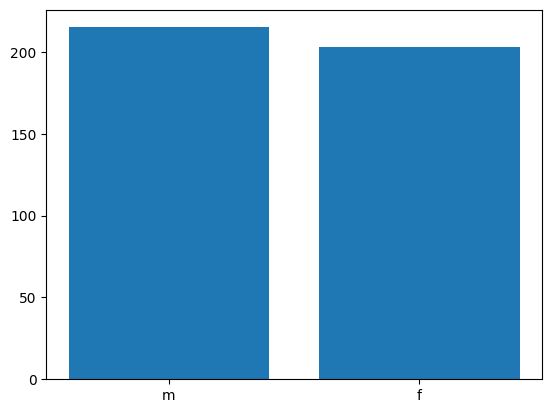

In [ ]:
plt.bar(gen.index, gen.values)

<Axes: ylabel='None'>

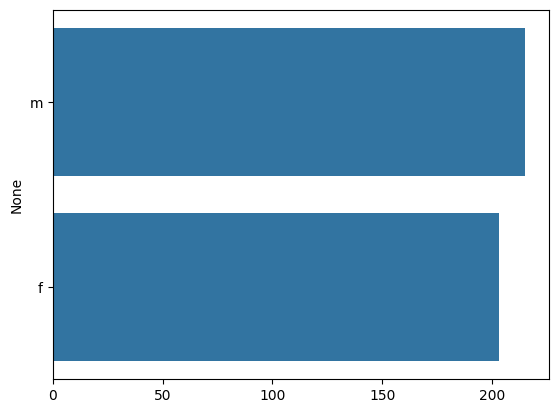

In [ ]:
sns.barplot(x=gen.values, y=gen.index, orient='h')

In [ ]:
wage['exper_inter'] = pd.cut(wage['EXPER'], 5, labels=['muy baja', 'baja', 'media', 'alta', 'muy alta'])

In [ ]:
wage['exper_inter']

0      muy baja
1      muy baja
2      muy baja
3          baja
4         media
         ...   
545    muy baja
546        baja
548    muy baja
549        alta
551    muy baja
Name: exper_inter, Length: 418, dtype: category
Categories (5, object): ['muy baja' < 'baja' < 'media' < 'alta' < 'muy alta']

In [ ]:
wage = wage.replace({'GENDER':{1:'f',0:'m'}})

In [ ]:
wage['GENDER'].value_counts()

male      215
female    203
Name: GENDER, dtype: int64

In [ ]:
pivot = wage.pivot_table(values='WAGE',
                 index='exper_inter',
                 columns='GENDER',
                 aggfunc='mean').stack().to_frame().reset_index().rename(columns={0:'mean_WAGE','GENDER':'gender'})

In [ ]:
wage.pivot_table(values='WAGE',
                 index='exper_inter',
                 columns='GENDER',
                 aggfunc='mean')

GENDER,female,male
exper_inter,,
muy baja,4.108148,6.021579
baja,5.347500,7.110000
media,4.316250,10.268125
alta,4.046552,7.750833
muy alta,4.640769,6.058889


In [ ]:
pivot

,exper_inter,gender,mean_WAGE
0,muy baja,female,4.108148
1,muy baja,male,6.021579
2,baja,female,5.347500
3,baja,male,7.110000
4,media,female,4.316250
5,media,male,10.268125
6,alta,female,4.046552
7,alta,male,7.750833
8,muy alta,female,4.640769
9,muy alta,male,6.058889


<Axes: xlabel='exper_inter', ylabel='mean_WAGE'>

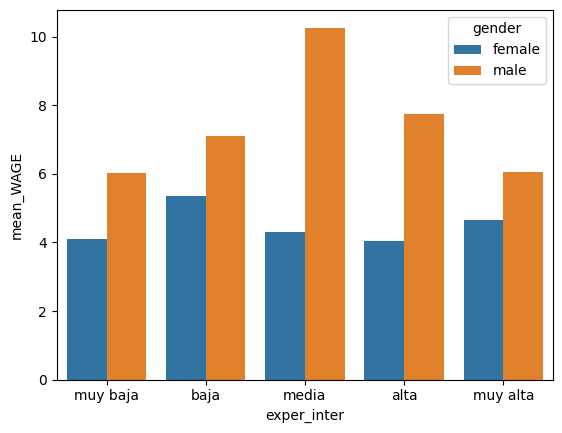

In [ ]:
sns.barplot(data=pivot, x='exper_inter',y='mean_WAGE',hue='gender')

<Axes: title={'center': 'Gráfico 1'}, xlabel='exper_inter', ylabel='mean_WAGE'>

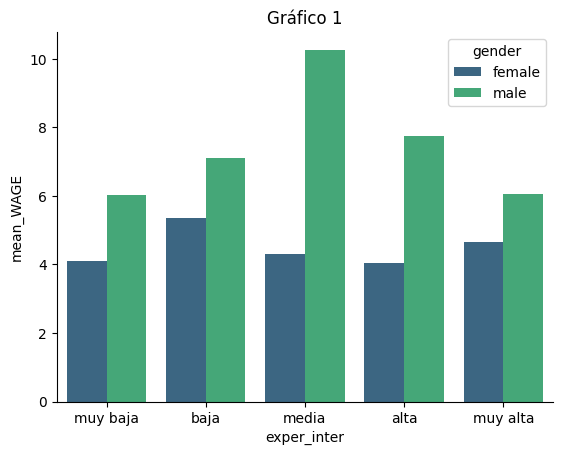

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Gráfico 1")
sns.barplot(data=pivot,
            x='exper_inter',
            y='mean_WAGE',
            hue='gender',
            palette='viridis',
            ax=ax )

<Axes: xlabel='FAM_STATUS'>

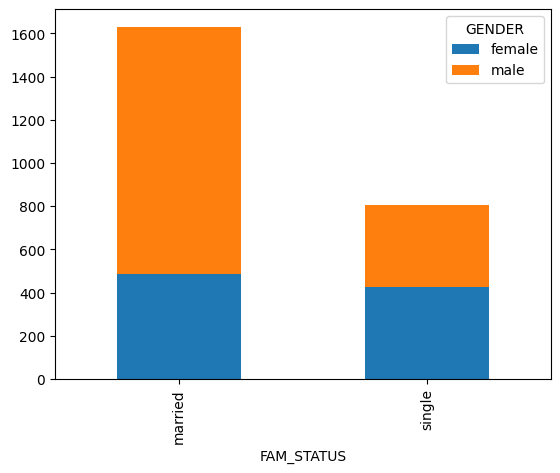

In [ ]:
(wage.groupby(['GENDER','FAM_STATUS'])['WAGE']
 .sum()
 .reset_index()
 .pivot(index='FAM_STATUS',values='WAGE',columns='GENDER')
 .plot(kind='bar',stacked=True))

In [ ]:
pd.crosstab(wage['GENDER'],wage['FAM_STATUS'], normalize=True)

FAM_STATUS,married,single
GENDER,,
female,0.260766,0.224880
male,0.344498,0.169856


<Axes: >

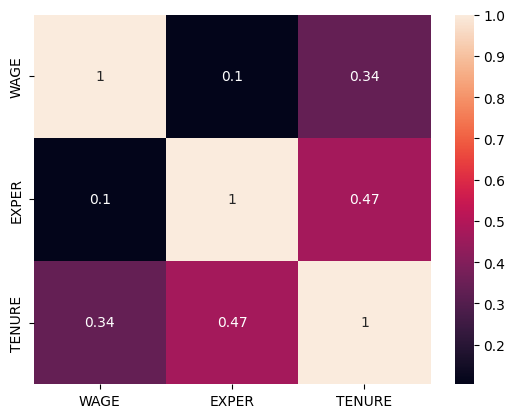

In [ ]:
df = wage[['WAGE','EXPER','TENURE']]
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='WAGE', ylabel='Count'>

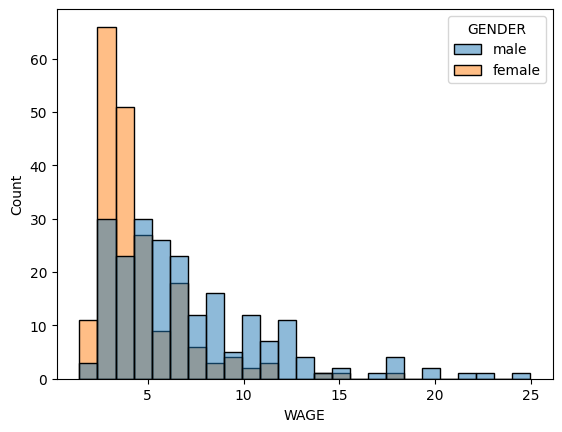

In [ ]:
sns.histplot(wage, x='WAGE', hue='GENDER')